<a href="https://colab.research.google.com/github/ibrayoubi10/TER-ALLERGIE/blob/Data_Anal/Analyse_Partie_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('All_Data.csv', delimiter=';')

#Display the first few rows of the dataframes
print(data.head())

#Affiche de nombre total de patients
total_patients = data['Patient_ID'].nunique()
print(f"Nombre total de patients : {total_patients}")

  Patient_ID Chip_Type   Age  Gender  Blood_Month_sample  \
0    FHB0001   ISAC_V1  21.0     1.0                11.0   
1    FHB0002   ISAC_V1  45.0     0.0                12.0   
2    FHB0003   ISAC_V1  18.0     1.0                 1.0   
3    FHB0004   ISAC_V1  19.0     0.0                 1.0   
4    FHB0005   ISAC_V1  28.0     0.0                 1.0   

  French_Residence_Department French_Region  Rural_or_urban_area  \
0                       deptY       regionB                    9   
1                       deptY       regionB                    9   
2                       deptY       regionB                    9   
3                       deptY       regionB                    9   
4                       deptY       regionB                    9   

   Sensitization Treatment_of_rhinitis  ... Man_i Mel_g  Mes_a_1_RUO Mor_r  \
0              1                     9  ...   NaN   NaN          NaN   NaN   
1              1                     9  ...   NaN   NaN          NaN   NaN

<ipython-input-4-4cfa26fc500e>:1: DtypeWarning: Columns (9,10,11,13,14,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('All_Data.csv', delimiter=';')


Pourcentage des hommes et des femmes :
Gender
1.0    50.819672
0.0    49.180328
Name: proportion, dtype: float64


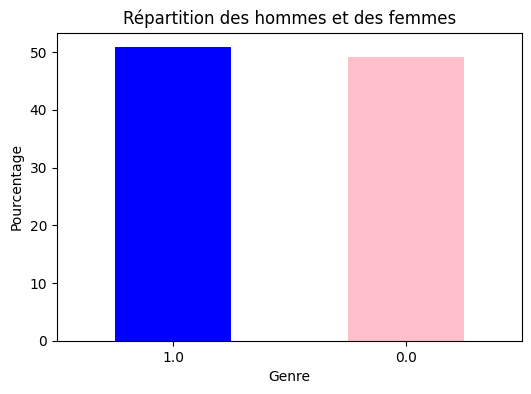

In [5]:
# Calcul du pourcentage des hommes et des femmes
gender_counts = data['Gender'].value_counts(normalize=True) * 100
print("Pourcentage des hommes et des femmes :")
print(gender_counts)

# Dessiner l'histogramme
plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title("Répartition des hommes et des femmes")
plt.xlabel("Genre")
plt.ylabel("Pourcentage")
plt.xticks(rotation=0)
plt.show()

L'âge moyen des patients : 23.08 ans


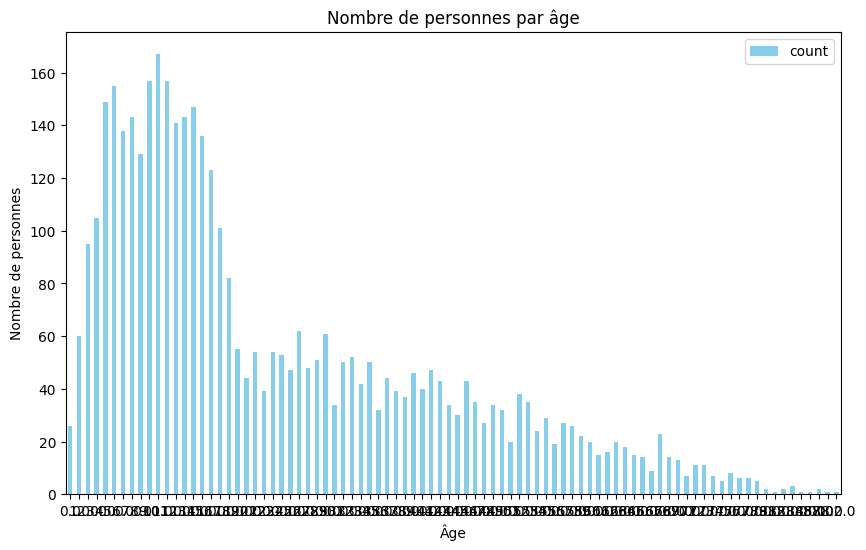

Nombre de personnes par âge : Age
0.0       26
1.0       60
2.0       95
3.0      105
4.0      149
        ... 
84.0       1
85.0       1
87.0       2
88.0       1
102.0      1
Name: count, Length: 88, dtype: int64


In [6]:
""" Partition des patients par âge """
# Calcul de l'âge moyen
age_mean = data['Age'].mean()
print(f"L'âge moyen des patients : {age_mean:.2f} ans")

# Dessiner l'histogramme du nombre de personnes par âge
age_counts = data['Age'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar', color='skyblue')
plt.legend()
plt.title("Nombre de personnes par âge")
plt.xlabel("Âge")
plt.ylabel("Nombre de personnes")
plt.xticks(rotation=0)
plt.show()
print("Nombre de personnes par âge :", age_counts)

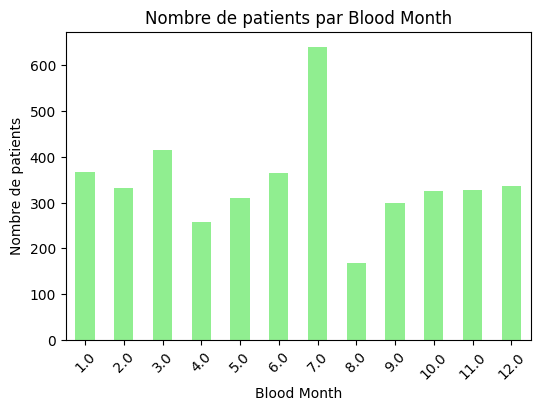

In [7]:
""" Partition par Blood month sample """
plt.figure(figsize=(6, 4))
data['Blood_Month_sample'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title("Nombre de patients par Blood Month")
plt.xlabel("Blood Month")
plt.ylabel("Nombre de patients")
plt.xticks(rotation=45)
plt.show()

Nombre de partient avec habitat manquant est :  2980 patients



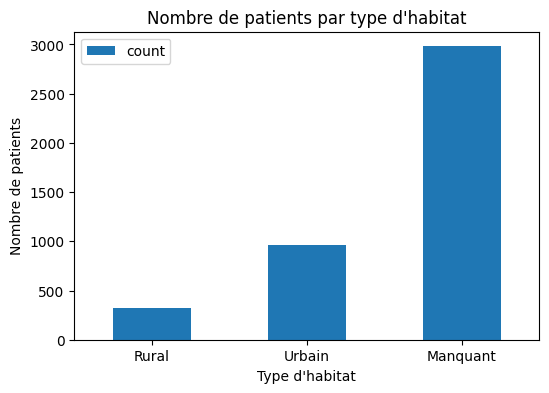

In [11]:
"""Partition par Type d'habitat"""
type_habitat= data['Rural_or_urban_area'].value_counts().sort_index()

for index, value in type_habitat.items():
    if index==9:
        print(f"Nombre de partient avec habitat manquant est :  {value} patients\n" )

plt.figure(figsize=(6, 4))
type_habitat.plot(kind='bar')
plt.title("Nombre de patients par type d'habitat")
plt.xlabel("Type d'habitat")
plt.ylabel("Nombre de patients")
plt.legend()
plt.xticks(ticks=[0, 1, 2], labels=["Rural", "Urbain", "Manquant"], rotation=0)
plt.show()

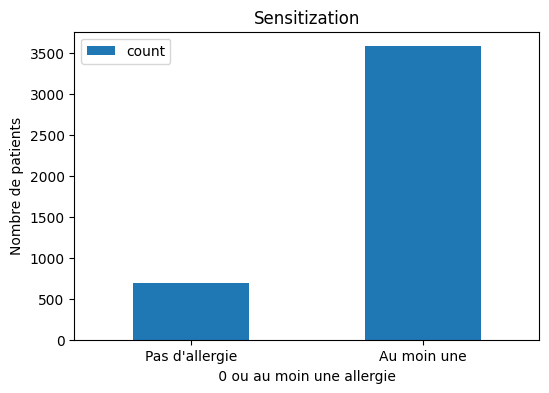

In [15]:
"""Partition par sensitized patients"""

sens= data['Sensitization'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
sens.plot(kind='bar')
plt.title("Sensitization")
plt.xlabel(" 0 ou au moin une allergie ")
plt.ylabel("Nombre de patients")
plt.legend()
plt.xticks(ticks=[0, 1], labels=["Pas d'allergie", "Au moin une" ], rotation=0)
plt.show()


Traitment de rhinitis qui se base sur 5 possibilités:

Niveau 0: Aucun
Niveau 1: Anti H1, voie locale
Niveau 2: Anti H1, voie générale
Niveau 3: Anti H1 + CS voie locale
Niveau 4: CS voie générale

---



Treatment_of_rhinitis
9      1503
9      1455
0       453
0       430
2       172
3        71
2        50
1        44
1        41
3        35
1,3       6
4         6
4         3
2,3       1
1,2       1
Name: count, dtype: int64


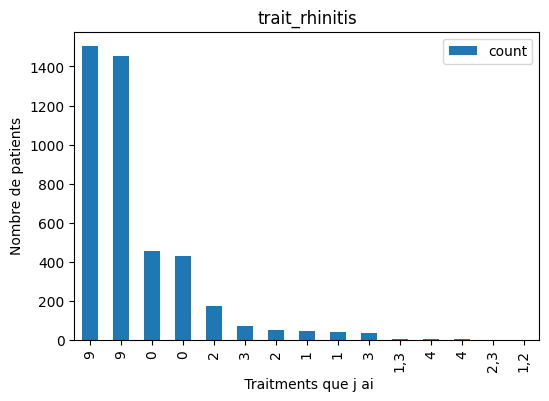

In [20]:
trait_rhitis= data['Treatment_of_rhinitis'].value_counts()

print( trait_rhitis)
plt.figure(figsize=(6, 4))
trait_rhitis.plot(kind='bar')
plt.title("trait_rhinitis")
plt.xlabel(" Traitments")
plt.ylabel("Nombre de patients")
plt.legend()
plt.show()

Treatment_of_athsma
9        2606
0         896
9         165
4         142
3         125
1         108
5         100
2          78
6           8
7           7
10          6
1,2         5
2,7         4
3           3
1           3
4           2
1,3         2
4,6         2
5,7         1
5,8         1
1,5,7       1
5,6         1
2, 5        1
8           1
0           1
1,4,6       1
5           1
Name: count, dtype: int64


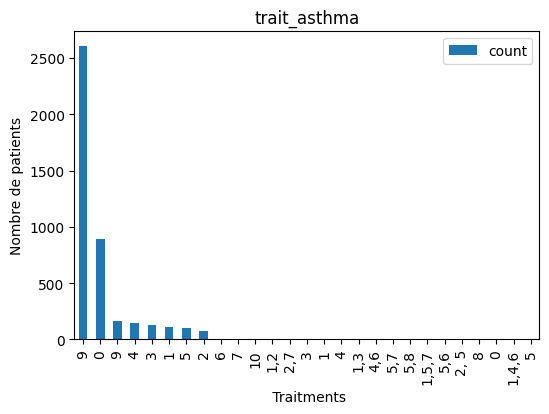

In [6]:
trait_athsma= data['Treatment_of_athsma'].value_counts()

print(trait_athsma)
plt.figure(figsize=(6, 4))
trait_athsma.plot(kind='bar')
plt.title("trait_asthma")
plt.xlabel(" Traitments")
plt.ylabel("Nombre de patients")
plt.legend()
plt.show()

Nombre de partient avec habitat manquant est :  2445 patients



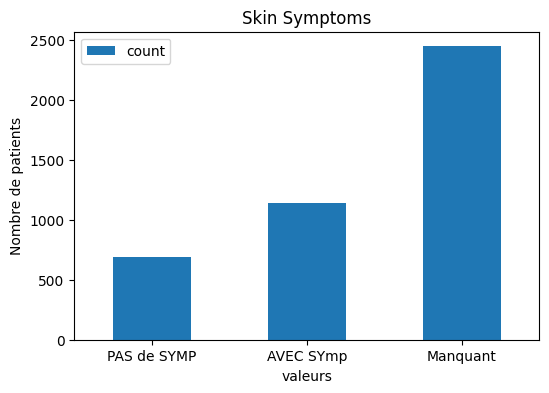

In [7]:
"""Partition par Type d'habitat"""
skin_symp= data['Skin_Symptoms'].value_counts().sort_index()

for index, value in skin_symp.items():
    if index==9:
        print(f"Nombre de partient avec habitat manquant est :  {value} patients\n" )

plt.figure(figsize=(6, 4))
skin_symp.plot(kind='bar')
plt.title("Skin Symptoms")
plt.xlabel("valeurs")
plt.ylabel("Nombre de patients")
plt.legend()
plt.xticks(ticks=[0, 1, 2], labels=["PAS de SYMP", "AVEC SYmp", "Manquant"], rotation=0)
plt.show()

General_cofactors
0                 2837
10                 918
0                  173
1                  127
5                   53
6                   44
7                   27
4                   22
3                   11
6, 7                 8
4, 7                 6
2                    4
1, 3                 3
1, 2                 2
4, 5                 2
6,7                  2
1,3                  2
1                    2
2, 3                 2
12                   2
8                    1
4, 6, 7, 11          1
6, 7                 1
6, 7, 1              1
7, 10                1
1, 6, 8              1
6, 7, 8, 10          1
1, 6, 7, 10          1
1, 6                 1
6, 8                 1
11                   1
4, 6                 1
4,6                  1
4, 6, 7              1
1, 5, 7              1
4, 5, 6, 7, 10       1
2, 12                1
1,5                  1
5,6,7                1
5, 6, 7, 10          1
5, 6, 7              1
4, 5, 10             1
6, 7, 10        

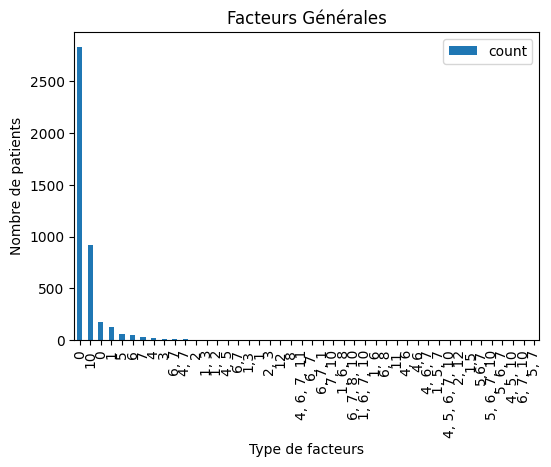

In [15]:
"""Partition par Type d'habitat"""
gen_cof= data['General_cofactors'].value_counts()

print(gen_cof)

for index, value in gen_cof.items():
    if index==9:
        print(f"Nombre de partient avec habitat manquant est :  {value} patients\n" )

plt.figure(figsize=(6, 4))
gen_cof.plot(kind='bar')
plt.title("Facteurs Générales")
plt.xlabel("Type de facteurs")
plt.ylabel("Nombre de patients")
plt.legend()
plt.show()